#  Reinforcement Learning, Fondamenti teorici: Programmazione Dinamica per la risoluzione di problemi

Mario Fiorino

>1.PREMESSA : Programmazione Dinamica (Dynamic Programming - DP)

In informatica la programmazione dinamica è una tecnica di progettazione di algoritmi basata sulla divisione del problema complesso in sottoproblemi più semplici concatenati, ovvero risolve un problema combinando le soluzioni dei suoi sottoproblemi. Si noti : la soluzione ottima di un problema contiene al suo interno la soluzione ottima di un sottoproblema.

La programmazione dinamica risolve in modo efficiente problemi di decisione di tipo sequenziale: calcolo del cammino minimo in un grafo con pesi, calcolo del costo minimo di un percorso, ...


>2.PREMESSA : Equazione di Bellman

Equazione, formulata dal matematico statunitense R.E. Bellman nel 1957, che esprime il valore della soluzione ottimale di un problema di ottimizzazione matematica traducibile in termini di programmazione dinamica ( ovvero scomponibile in una sequenza di sottoproblemi concatenati ).

L'equazione di Bellman ci cosente di esprimere il valore ottimo in uno stato come la somma della ricompensa immediata e del valore ottimo atteso nello stato successivo, pesato da un fattore di sconto. Questa equazione fornisce un modo efficace per risolvere problemi complessi decomponendoli in sotto-problemi più gestibili.

L’equazione di Bellman sfrutta il cosiddetto principio di ottimalità.

Principio di Ottimalità:
Ogni punto lungo una traiettoria ottima garantisce che il percorso rimanente sia anch'esso ottimale per il problema specifico associato a quel punto d'inizio.

Spiegato con un esempio, tale principio dice semplicemente che, se si considera la strada più corta per andare da Roma a Parigi e questa passa da Milano, il tratto Milano-Parigi di questo percorso ottimale è il più corto fra tutti quelli che vanno da Milano a Parigi (https://www.treccani.it/enciclopedia/equazione-di-bellman_%28Dizionario-di-Economia-e-Finanza%29/
).

L'equazione di Bellman può essere utilizzata per risolvere problemi di programmazione dinamica in modo iterativo.



>3.PREMESSA : Markov Decision Processes

Il presente notebook presuppone che il lettore abbia familiarità con il framework Markov Decision Processes (MDP), utilizzato per descrivere l'ambiente in cui si agisce.

In alternativa si consiglia:

https://www.davidsilver.uk/wp-content/uploads/2020/03/MDP.pdf


Chapter 1 - Basic Concepts: https://github.com/MathFoundationRL/Book-Mathmatical-Foundation-of-Reinforcement-Learning/tree/main


# Introduzione


Nel contesto del RL, la programmazione dinamica (DP) fornisce un insieme di algoritmi (esempio : Policy iteration e Value iteration) utilizzati per calcolare policy ottimali in base a un modello dell'ambiente formalizzato tramite Processo Decisionale Markoviano (MDP), completamente noto. In modo più formale: la programmazione dinamica è un metodo, che sfrutta porcessi iterativi, per trovare soluzioni esatte ai modelli decisionali di tipo Markoviano, completamente noti, senza eseguire una ricerca esaustiva (alias: https://en.wikipedia.org/wiki/Brute-force_search , cioè provare ogni policy possibile e valutarne le prestazioni) nello spazio delle policy.

Gli algoritmi DP classici hanno un'utilità limitata nel RL per due motivi: in primo luogo, presuppongono una conoscenza perfetta dell'ambiente, cosa difficilmente ottenibile nella realtà; in secondo luogo, sono computazionalmente costosi.
Tuttavia, la DP rimane importante a livello teorico, fornendo un fondamento essenziale per comprendere le pricipipali metodologie usate nel RL. In pratica, queste metodologie possono essere visti come tentativi di ottenere lo stesso risultato della DP, ma con una minore computazione e senza assumere un modello perfettamente noto dell'ambiente.


>RIFEMRIMENTI

Testo di riferimento di RL:

Reinforcement Learning: An Introduction

Richard S. Sutton and Andrew G. Barto, Second Edition - MIT Press, Cambridge, 2018

Una versione in PDF dovrebbe essere presente qui :

https://www.andrew.cmu.edu/course/10-703/


Lezioni on-line di RL (in inglese):

https://github.com/andri27-ts/Reinforcement-Learning#week-2---rl-basics-mdp-dynamic-programming-and-model-free-control

Corso di RL di David Silver:

https://www.davidsilver.uk/teaching/


Corso di RL di Yuejie Chi:

https://users.ece.cmu.edu/~yuejiec/ece18813B.html

Corso di RL di Katerina Fragkiadaki, Tom Mitchell

https://www.andrew.cmu.edu/course/10-703/

Corso di RL di Alberto Castellini

https://profs.scienze.univr.it/~castellini/reinforcementLearning22-23.html

°

Teoria del controllo ottimale (Optimal control theory):

Testo di Bertsekas: Dynamic Programming and Optimal Control


Sito di Bertsekas:

http://web.mit.edu/dimitrib/www/abstractdp_MIT.html

Lezioni on-line di Bertsekas:
https://www.youtube.com/playlist?list=PLmH30BG15SIqgS8N1TLhSQV1jwiB7ufxI


Articolo di Bellman:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1063639/pdf/pnas01581-0064.pdf


##Policy Evaluation (Prediction)

L’idea chiave di DP, è l’uso di funzioni-valore (value functions) per organizzare e strutturare la ricerca di buone politiche. Possiamo facilmente ottenere politiche ottimali una volta trovate le funzioni-valore ottimali. Di base, gli algoritmi DP funzionano trasformando le equazioni di Bellman in regole di update. Queste regole vengono utilizzate per migliorare l'approssimazione delle funzioni-valore desiderate.


Iniziamo esaminando il procedimento per il calcolo della funzione-valore associata a una policy arbitraria. Tale procedura è comunemente nota come **policy evaluation** (o problema di previsione) nella letteratura della Programmazione Dinamica.

Condizioni di applicabilità: La dinamica dell’ambiente, ovvero il Markov Decision Process (MDP) : $ <S, A, P, R, γ>$ , è completamente nota.

Input  : data una certa policy 𝜋

Ingrediente di base : calcolare la funzione-valore relativa ad ogni stato di MDP : $v_{𝜋}(s)$ $\forall s \in S$, in modo iterativo sfruttando l'equazione di Bellman come regola di aggiornamento:


<div>
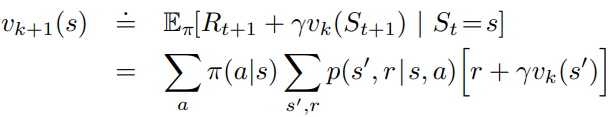
</div>

Dove:

$ 𝜋(a|s)$ è la policy , o regola di selezione delle azioni, in pratica è la distribuzione da cui viene campionata un azione $a$ nello stato $s$.

$p(s',r|s,a)$ è probabilità di transizione di finire in $s'$ con relativo reward $r$, dati in ingresso $(s,a)$

la funzione-valore $v_{k}$ è stata ottenuta nel ciclo iterativo $k$, quello che precede il ciclo $k+1$

$𝑠′$ è uno stato successsivo di $𝑠$.


Procedimento :

in pratica si considera una sequenza di funzioni-valore che approssimano progressivamente (durante il ciclo iterativo)  $v_{𝜋}(s)$ ; ovvero : $v_{0}(s)$ , $v_{1}(s)$ , $v_{2}(s)$ ,..., $v_{𝜋}(s)$ . L'approssimazione iniziale, $v_{0}(s)$ , viene scelta arbitrariamente e ogni approssimazione successiva viene ottenuta utilizzando l'equazione di Bellman.


Algoritmo : "**Iterative Policy Evaluation**".



1.   Si inizia con la scelta di una policy arbitraria $π$
2.   Si inizializza la funzione-valore di partenza : $v_{0}(s)$ $ \: \forall s \in S$. Ad esempio, si può scegliere di inizializzare  $v_{0}(s) = 0 $ , per tutti gli stati $s$. Questa scelta equivale a non avere alcuna memoria di ricompensa.
3.   Calcola la nuova funzione-valore $v_{k+1}(s)$  ovvero, $ v_{1}(s) $  utilizzando l'equazione di Bellman come regola di update, su $v_{k}(s')$ , ovvero su  $ v_{0}(s') $ . Notare: con k=0 si intendono i valori della funzione-valore del ciclo precedente a k=1, mentre $𝑠′$ è uno stato successsivo di $𝑠$.
4.   Ripetendo l'elaborazione utilizzando $ v_{1}(s) $ per calcolare $ v_{2}(s) $ e proseguendo...$ v_{∞}(s) $ alla fine convergerà la nostra funzione valore a $ v_{π}(s) $ .

°

Domanda :

Quali condizoini ci garantiscono che la sequenza  $v_{0}(s)$ , $v_{1}(s)$ , $v_{2}(s)$ ,..., $v_{\infty}(s)$ converga; o melgio che Algoritmo Iterative Policy Evaluation sia convergente in $v_{\pi}$ ?

Risposta: fintanto che:

il fattore di sconto risutla $ 0 \le γ < 1$

oppure

partendo da qualunque stato $s \in S$ , sarà sempre possibile raggiungere uno stato terminale in un numero finito di passi, seguendo la politica $π$

La convergenza della sequenza $ \{v_{k}\} $ , per $k → ∞$ , è garantita.


Una dimostrazione più articolata, fondata sul "Contraction Mapping Theorem" può essere trovata qui:
https://runzhe-yang.science/2017-10-04-contraction/

"Based on these mathematical foundations, we investigate the contractive dynamic programming, where the contraction property and the monotonicity property together guarantee a unique optimal solution can be achieved"





# Come migliorare una policy? (Control problem)

Nell'approccio precedente (Policy Evaluation) abbiamo valutato una determinata policy, ma non abbiamo trovato la policy migliore nel nostro ambiente. Una policy $𝜋'$ è un miglioramento della policy $𝜋$,  se  $v_{𝜋'}(s) \geq  v_{𝜋}(s)$  $\:\: \forall s \in S$.

Domanda:

Data una certa policy $𝜋$ , come trovarne un altra che ci consente di ottenere una maggiore ricompensa complessiva?

Nell'esempio precedente, nella fase Policy Evaluation, già possiamo intuire che, data una policy e la sua funzione-valore, possiamo facilmente considerare una policy migliore di quella data, scegliendone una che, per ogni stato, specifichi l'azione che massimizza la funzione-valore nello step successivo (e non segue un azione nata da un campionamento "random 0.25", come fa la policy di partenza dell'esempio).

Ma andiamo per gradi, per rispondere in modo approfondito alla domanda, prendiamo il considerazione la  Q-function : $q_{𝜋}(s,a)$ , ovvero una funzione (molto simile alla funzione-valore $v_{𝜋}(s)$) che indica la ricompensa cumulativa attesa nell'intraprendere l'azione $a$ nello stato $s$, seguendo una certa policy $𝜋$, in pratica ci dice quanto è buona una certa coppia stato-azione.

Definizione formale :

<div>
<img src=" 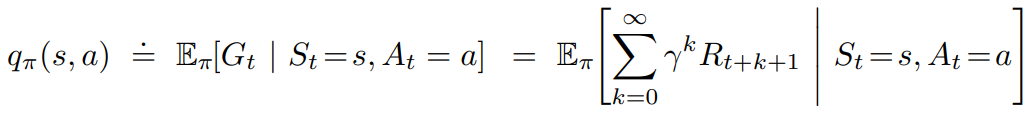 ", width="500">
</div>


Per quanto riguarda il legame tra la Q-fuction e la funzione-valore, valgono le realzioni:




$v_{𝜋} =  \sum\limits_{a\in A }  𝜋(a|s) q_{𝜋}(s,a) $


$q_{𝜋}(s,a)  = \sum\limits_{s'\in S }  p (s'|s,a) \:   [r(s,a,s')  + γ \; v_{𝜋}(s') ] $

per il leggero abuso formale della notazione di $q_{𝜋}(s,a)$, leggere: Chapter 3, pag-PDF 70 e 71, del libro Reinforcement Learning, Richard Sutton and Andrew Barto, 2018

Seguendo una certa policy $𝜋$, come possiamo identificare un'azione $a$ tale che:

$q_{𝜋}(s,a) \geq  v_{𝜋}(s)$  $ \:\: \forall s \in S$  ?

Per rispondere introduciamo un teorema ed una definizione.



Teorema.

**Policy improvement theorem**:

Scelta una policy stazionaria $π$, e sia $π'$ una policy deterministica tale che :

$q_{𝜋}(s,𝜋'(s)) \geq  v_{𝜋}(s)$  $\:\: \forall s \in S$

allora:

$v_{𝜋'}(s) \geq  v_{𝜋}(s)$  $\:\: \forall s \in S$.


Definizione.

Si definisce **greedy**, rispetto $q_{𝜋}$, una certa policy $𝜋'$ se, per ogni stato risulta:

$𝜋' \doteq  \underset{a}{\arg\max}  \;  q_{𝜋}(s,a) $

In pratica una policy greedy sceglie sempre l’azione che massimizza nel breve termine (dopo un solo step) il valore di $q_{𝜋}(s,a)$.

*

Proviamo adesso a rispondere alla domanda di partenza: "Seguendo una certa policy $𝜋$, come possiamo identificare un'azione $a$ tale ... "


Sia introdotta la policy greedy:

$𝜋' \doteq  \underset{a}{\arg\max}  \;  q_{𝜋}(s,a) $

Ciò verifica l'uguaglianza:

$q_{𝜋}(s,𝜋'(s)) = \underset{a}{\max}  \;  q_{𝜋}(s,a) $

Passaggio 1

$\underset{a}{\max}  \;  q_{𝜋}(s,a)  \geq q_{𝜋}(s,𝜋(s)) $

Passagggio 2


$ q_{𝜋}(s,𝜋(s)) = v_{𝜋}(s) $

Passaggio 3, quindi verificata la premessa del Policy improvement theorem,

$q_{𝜋}(s,𝜋'(s)) \geq  v_{𝜋}(s)$

ciò garantisce la sua conclusione:

$v_{𝜋'}(s) \geq  v_{𝜋}(s)$

La policy greedy soddisfa le condizioni del Policy improvement theorem, quindi sappiamo che è altrettanto buona, o migliore, della policy originale.


Per tanto per migliorare una data policy $𝜋(s), $ possiamo  agire greedy! cioè scegliendo l'azione che risulta la migliore nel breve termine - dopo un solo step : "one step of lookahead " - rispetto i valori di $v_{𝜋}(s)$

*

Il processo di creazione di una nuova policy che migliora quella originale, rendendola greedy rispetto alla funzione-valore della policy originale, è chiamato **policy improvement**.



# Policy optimization


Fin'ora abbiamo capito come valutare una policy e come migliorarla, il prossimo passo consiste nel capire:


Come trovare una policy ottimale per un dato ambiente MDP ?

Si ricorda che una policy ottimale è migliore (ovvero consente di ottenere una maggiore ricompensa complessiva) o uguale a tutte le altre politiche. In genere si denota così $𝜋^{*}$.

Mentre la  funzione-valore ottimale è indicata con $v^{*}$. Formalemente si puo scrivere:

$v^{*}(s) = \underset{𝜋}{\max}  \;  v_{𝜋}(s) $
  $\: \: \: \forall s \in S $


*

Siamo sicuri che esiste sempre una policy ottimale ?

C'è un lemma, nel lavoro di Bellman che garantisce che dato un MDP con orizzonte infinito e scontato (cioè il fattore $γ$ sia compreso tra $ 0 < γ < 1 $),
esiste sempre almeno una policy stazionaria e deterministica $𝜋^{*}$ che sia ottimale.

Nota: policy stazionaria significa che non dipende dal fattore tempo, considera solo lo stato corrente per determinare l’azione. Un esempio di policy non stazionarie può essere facilmente trovato nel contesto RL multi-agente.

*

Da notare che possiamo facilmente ottenere policy ottimali una volta trovate le funzioni-valore o Q-function ottimali, sfruttando le equazioni di ottimalità di Bellman:


<div>
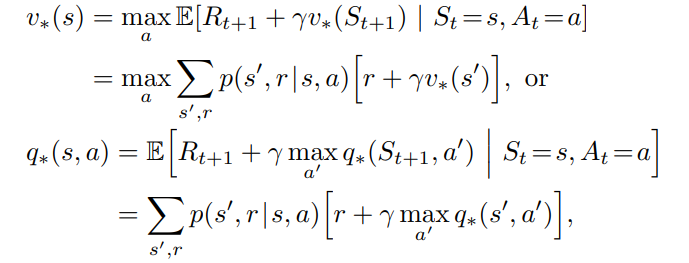
</div>


Si noti:

$p(s',r|s,a)$ è probabilità di transizione di finire in $s'$ con relativo reward $r$, dati in ingresso $(s,a)$


$𝑠′$ è uno stato successsivo di $𝑠$.

$a′$ è l'azione che verrà intrapresa nello stato successsivo $𝑠'$.

Per rispondere alla domanda sul come trovare una policy ottimale, possimo ragonare in modo iterativo; ovvero:


data un certa policy $𝜋$, da questa ricaviamo per ogni stato la funzione valore $v_{𝜋}$.

Poi, in modalità greedy, sfruttando la funzione valore $v_{𝜋}$; miglioriamo la policy di partenza, ottenendo una nuova policy : $𝜋'$, di cui possiamo calcolare $v_{𝜋'}$.

Da qui, sempre in modalità greedy, sfruttando la funzione valore $v_{𝜋'}$; milgioriamo la policy  $𝜋'$ , ottenendo una nuova policy : $𝜋''$, ... così via ..., ogni policy così ottenuta garantisce un  miglioramento rispetto alla precedente (a meno che non sia già ottimale). Quindi, ripetendo il procedimento più volte possiamo così ottenere a sequenza di policy e funzioni-valore che migliorano monotonicamente. Tale procedimento è detto **policy iteration**.

Schema sintetico:

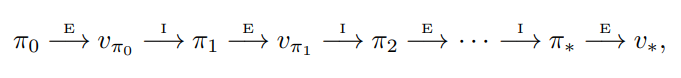




In cui: "E" indica la fase di  policy evaluation.
Mentre "I" la fase di policy improvemen, ovvero l a fase "greedy"

*

Si noti:

In un MDP finito che ha  un numero finito di policy, questo processo convergere verso una policy ottimale  in un numero finito di iterazioni. Discorso simile per un MDP con orizzonte infinito e scontato. Per maggiori informazioni (o dimostrazione matematica) rigurdo la convergenza (e le reative condizioni necessarie) di tale processo iterativo si rimanda ai testi:

Reinforcement Learning:Theory and Algorithms
Alekh Agarwal Nan Jiang Sham M. Kakade Wen Sun

il testo di Bertsekas

le slide di Silver




**Policy Iteration algorithm**, è composto dai segiueti step:

1.
Fase di inizializzazione (arbitraria) della funzione valore $v$ e della policy $𝜋$

Loop tra le fasi 2 $  ⟷ $ 3

2.
Fase di Policy Evaluation.

(sfruttiamo l'equazione di Bellman come regola di update)

Da notare che qui:

2.A) il calcolo iterativo, viene avviato con la funzione valore della policy precedentemente ottenuta.

2.B) formalmente, il loop sul Bellman-update converge a $v_{𝜋}$
solo nel limite $ ∞ $, ma in pratica deve essere fermato prima di raggiungere questo limite. Vanno così introdotte, condizioni di stop: $\Delta < \theta $ , dove $\theta$ è un piccolo numero positivo che determina l'accuratezza della stima.
Si può usare come test il valore: $\Delta = \max  \;  |v_{k+1}(s) - v_{k}(s)| $ . Per maggiori dettagli vedi testo: Reinforcement Learning, Richard Sutton and Andrew Barto, 2018 pag pdf 97


3.
Fase di Policy Improvement

(agisci greedy)

Se la policy trovata è stabile, cioè non sono più possibili miglioramenti (l' azione greedy scelta è sempre la stessa), allora fermati e ritorna i valori ottimali trovati;

Altrimenti ritorna alla fase 2.



# Esempio applicativo - Policy Iteration

A titolo di esempio, lavoreremo sull'ambiente **Frozen Lake**, fornito dalla libreria Gym.

Frozen Lake 4x4 è composto:

da 16 stati,(da Start a Goal) codificati dagli interi 0 a 15;

4 azioni: sinistra, giù, destra, su saranno codificate da 0 a 3.

L'agente potrebbe non muoversi sempre nella direzione desiderara a causa della natura scivolosa del lago ghiacciato. Prob_transizione =  33,3%

Scopo del gioco: raggiungere lo stato terminale (con unico reward +1) dallo stato iniziale senza visitare gli stati con buco.




Sito di riferimento:

https://www.gymlibrary.dev/environments/toy_text/frozen_lake/

Per maggior info:

https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Introduzione_OpenAI_Gym.ipynb



In [ ]:
# Il codice sottostante è stato ispirato ed ha come riferimento i codici:
# https://github.com/PacktPublishing/Deep-Reinforcement-Learning-with-Python/blob/master/03.%20Bellman%20Equation%20and%20Dynamic%20Programming/3.08.%20Solving%20the%20Frozen%20Lake%20Problem%20with%20Policy%20Iteration.ipynb
# di Sudharsan Ravichandiran

#https://github.com/PacktPublishing/Reinforcement-Learning-Algorithms-with-Python/blob/master/Chapter03/frozenlake8x8_policyiteration.py
# di Andrea Lonza

import gym
import numpy as np

# se si desidera il redering caricare anche i moduli qui sotto
from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display

In [ ]:
env = gym.make('FrozenLake-v1')

def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Range: {env.reward_range}")

query_environment('FrozenLake-v1')

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Reward Range: (0, 1)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


### Calcolo della funzione-valore (Policy Evaluation)

La funzione-valore viene calcoata per ogni stato dell'ambinete, utilizzando la policy data in input.

Tale calcolo si basa sull'update di Bellman.

Ad esempio, se si parte dalla seguente funzione valore:

<font color='gray'>old_value_table</font> =

<font color='gray'>
[0.16,  $\:\:$ 0.082, $\:\:$ 0.12, $\:\:$ 0.06]


[0.17, $\:\:$0., $\:\:$    0.17,$\:\:$  0.    ]</font>


<font color='gray'>
[0.18, $\:\:$ 0.37,$\:\:$ 0.41,$\:\:$ 0.    ]


[0.,   $\:\:$$\:$    0.52,$\:\:$ 0.70,$\:\:$  0.    ]</font>


In cui, per ogni stato è associato un valore, cioè nello stato = 0, avremo <font color='gray'>old_value_table[0] = 0.16 </font>; mentre nello stato = 6, avremo <font color='gray'>old_value_table[6] = 0.17 </font>

Premesso che prob_transizioine  = 0.333.

La regola di update, nello stato 9, per un'azione speficata dalla policy in quello stato, per esempio "destra" , (<font color='gray'> env.P[9][2] </font>);   è la seguente:



$ value\_{table}[9] $

=

$ 0.333 * (   0 + (gamma * (old\_value\_table[next state=13] = 0.53) \;) \;) $

+

$ 0.333 * (   0 + (gamma * (old\_value\_table[next state=10] = 0) \;) \;) $

+

$ 0.333 * (   0 + (gamma * (old\_value\_table[next state=5] = 0.41) \;) \;) $


In pratica, sono tre gli stati raggiungibili con la regola data dalla transizione di probabilità dell'ambiente; in questo specifico caso, tutti hanno un reward pari a 0. Sommando i tre addendi si ottiene il nuovo valore di <font color='gray'>value_table[9]</font>. Questo chiaramente vale per ogni stato

In [ ]:
def compute_value_function(policy,gamma):

    #limite o threshold value - accuracy of estimation 0.000000001
    threshold = 1e-9

    #Inizializziamo all'inizio di ogni ciclo iterativo
    # la tabella della funzione-valore, con zero per tutti gli stati
    value_table = np.zeros(env.observation_space.n)

    #contatore iterazioni
    i=0

    while True:

        #Appoggiamo la funzione-valore appresa nel ciclo iterativo precedente nella locazione: odl_value_table
        old_value_table = np.copy(value_table)

        # per ogni stato s
        for s in range(env.observation_space.n):

            # selezioniamo l'azione in base alla politica data
               a = policy[s]

            #Calcolo della funzione-valore sfruttando update di Bellman
               value_table[s] = sum([prob * (r + (gamma * old_value_table[s_]))
                                        for prob, s_, r, _ in env.P[s][a]])
        # Si noti nell'update di sopra ho usato l'algoritmo "with two arrays" : value_table[] e old_value_table[]
        # Il libro di Sutton & Barto discute la cosa, e preferisce usare (dove è possibile farlo)
        # un aggiornamento "in place", cioè solo value_table[]. Anche nello pseudocode-Iterative Policy Evaluation,
        # sceglie di usare tale strategia "in place".
        # vedi pagina PDF : 97
        # "With two arrays, the new values can be computed one by one from the old values without the old values being changed.
        # Of course it is easier to use one array and update the values “in place,” that is, with each new value immediately
        # overwriting the old one. Then, depending on the order in which the states are updated, sometimes new values are used instead of old ones on the right-hand side of bellman equation.
        # This in-place algorithm also converges ; in fact, it usually converges faster than the two-array version,
        # as you might expect, because it uses new data as soon as they are available. "
        # Per tale aggiornamento "in place" è garantita a quali condizioni la convergenza?
        # Si paral della cosa a pagina PDF : 107, riguardo però il processo di value iteration :
        # " For example, one version of asynchronous value iteration updates the value, in place,
        #  of only one state, s_k, on each step, k, using the value iteration update rule.
        # If 0 <= gamma  < 1, asymptotic convergence to optimal value fuction is guaranteed given only that all states occur in the
        # sequence {sk} an infinite number of times (the sequence could even be stochastic)."
        #
        # Per ulteriori info sull'argomento vedere anche il corso di Silver (Asynchronous Dynamic Programming):
        # https://www.davidsilver.uk/wp-content/uploads/2020/03/DP.pdf
        # oppure una sintesi :
        # https://goodboychan.github.io/reinforcement_learning/2020/06/10/02-Variants-of-dynamic-programming.html


        # Dopo aver calcolato la tabella della funzione-valore di tutti gli stati,
        # controlliamo se la differenza tra la tabella dei valori ottenuta nell'iterazione corrente e
        # l'iterazione precedente è minore o uguale a un valore di soglia.
        # Se è inferiore, interrompiamo il ciclo e restituiamo la tabella dei valori
        if (np.sum((np.fabs(old_value_table - value_table))) <= threshold):
            break

        i+= 1

    print("Policy Evaluation : Value_table OUT: \n",value_table.reshape((4,4)).round(decimals=4))
    print("La convegenza della Value_table è stata ottenuta dopo ",i+1," iterazioni.")

    return value_table

### Agisci Greedy! (Policy Improvement)

Aggiorna la policy in base alla funzione valore

In [ ]:
#
# Premessa Tecnica #
#

# Per meglio capire il Nested List Comprehensions usato nella funzione: policy_improvement(value_table,policy,gamma):
# Studiare l''esempio :

lista = [1,2]

newlist = [sum([x + a for x in lista]) for a in range(999,1004)]

#Il rigo di sopra è equivalente a tutto il codice scritto sotto:

k = []
for a in range(999,1004):
  m = []
  for x in lista:
      m.append(x+a)
  #print("Array ausiliario : ",m)
  k.append(sum(m)) # La funzione sum() somma degli elemente dell'array e ne restituisce il risultato.



print(newlist==k)
print(k)

True
[2001, 2003, 2005, 2007, 2009]


In [ ]:
def policy_improvement(value_table,policy,gamma):

    policy_stable = True

    for s in range(env.observation_space.n):

        old_a = policy[s]
        # aggiornare la policy con l'azione greedy in accordo con la value table(next state), su ogni azione disponibile
        act_greedy = np.argmax([np.sum([prob * (r + gamma*value_table[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
        policy[s] =  act_greedy

        if old_a != policy[s]:
            policy_stable = False

    #Display la policy
    a2w = {0:'<', 1:'v', 2:'>', 3:'^'}
    ap = np.array([])
    for i in policy:
       ap = np.append(ap,a2w[int(i)])
    print("Greedy Process : Policy OUT: \n",ap.reshape((4,4)))

    return policy, policy_stable


### Policy Iteration

In [ ]:
def policy_iteration(env):

    #Discount factor
    gamma = 0.95

    # Inizializza la policy. Qui ho scritto due alternative.
    #1. selects the action 0 in all the states
    #policy = np.zeros(env.observation_space.n)

    #2. generate 1D policy array of 15 random integers between 0 and 3
    policy = np.random.randint(0, 4, 16) + np.zeros(env.observation_space.n)

    #Display la policy
    a2w = {0:'<', 1:'v', 2:'>', 3:'^'}
    a_ini = np.array([])
    for i in policy:
       a_ini = np.append(a_ini,a2w[int(i)])
    print("\n-- Inizializzazione della policy")
    print("La policy da cui partiamo: \n",a_ini.reshape((4,4)))


    policy_stable = False
    cont = 0

    while not policy_stable:
        print(" \n-- Policy Iteration process : Iterazione numero", cont )
        value_table = compute_value_function(policy,gamma)
        policy, policy_stable = policy_improvement(value_table, policy,gamma)
        cont += 1

    return policy


In [ ]:
optimal_policy = policy_iteration(env)


-- Inizializzazione della policy
La policy da cui partiamo: 
 [['>' '<' '>' 'v']
 ['>' '>' 'v' '^']
 ['<' '^' '>' '>']
 ['<' '<' '<' '^']]
 
-- Policy Iteration process : Iterazione numero 0
Policy Evaluation : Value_table OUT: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
La convegenza della Value_table è stata ottenuta dopo  1  iterazioni.
Greedy Process : Policy OUT: 
 [['<' '<' '<' '<']
 ['<' '<' '<' '<']
 ['<' '<' '<' '<']
 ['<' '<' 'v' '<']]
 
-- Policy Iteration process : Iterazione numero 1
Policy Evaluation : Value_table OUT: 
 [[0.     0.     0.0301 0.014 ]
 [0.     0.     0.065  0.    ]
 [0.     0.     0.175  0.    ]
 [0.     0.     0.4878 0.    ]]
La convegenza della Value_table è stata ottenuta dopo  37  iterazioni.
Greedy Process : Policy OUT: 
 [['<' 'v' '>' '^']
 ['<' '<' '<' '<']
 ['<' 'v' '<' '<']
 ['<' 'v' '>' '<']]
 
-- Policy Iteration process : Iterazione numero 2
Policy Evaluation : Value_table OUT: 
 [[0.     0.0304 0.0958 0.0828]
 [0.     0.  

### Test della policy finale ottenuta

In [ ]:
def test_optimal_poliscy(env, policy, numero_partite=1000):

    tot_rew = 0
    state = env.reset()

    for _ in range(numero_partite):

        done = False
        while not done:
            next_state, reward, done,_ = env.step(policy[state])

            state = next_state
            tot_rew += reward

            if done:
                state = env.reset()

    print("Sono state vinte: ",int(tot_rew)," su ", numero_partite, "partite giocate")

In [ ]:
test_optimal_poliscy(env,optimal_policy)
#
# Concludendo#
#
# La optimal policy mira a massimizzare la probabilità
# di raggiungere l'obiettivo

Sono state vinte:  740  su  1000 partite giocate


### Considerazioni finali sull'interazione tra la fase Policy evaluation e la fase Policy improvement.

In merito a tale interazione, il seguente passo dal testo di Sutton & Barto, pag PDF : 108, è molto esplicativo:


" Almost all reinforcement learning methods are well described as generalized policy iteration. That is, all have identifiable policies and value functions, with the policy always  being improved with respect to the value function and the value function always being driven toward the value function for the  policy.
If both the evaluation process and the improvement process stabilize, that  is, no longer produce changes, then the value function and policy must be optimal.
The value function stabilizes only when it is consistent with the current policy, and the policy stabilizes only when it is greedy with respect to the current value function. Thus, both processes stabilize only when a policy has been found that is greedy with
respect to its own evaluation function" ...


# Value Iteration

Problema:

Uno svantaggio del metodo di Policy Iteration è che ciascuna delle sue iterazioni comporta una  fase di Policy evaluation, che può essere un calcolo iterativo lungo e computazionalmente costoso.

Soluzione:

Sfruttare la seguente regola di update, basata sull' equazione di ottimalità di Bellman :

<div>
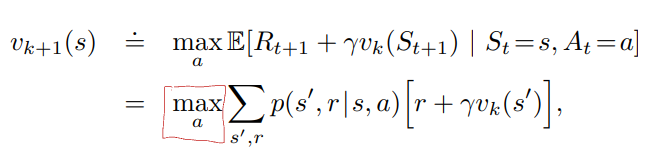
</div>




Intuitivamente : si inizia con le ricompense finali e si lavora a ritroso. Senza coinvolgere nessuna policy.

<div>
<img src= "

"
, width="400">
</div>

Value Iteration Algorithm  :

1. Inizializza la funzione valore.
2. Sviluppa un loop iterativo, simile a quello della policy evalutation (ma senza policy!), che sfrutta la regola di update sopra indicata
3. estrai la policy ottimale dalla funzione valore ottenuta nel passaggio 2.


Per capirci di più studiare il codice sottostante: Esempio applicativo - Value Iteration - Frozen Lake

Note:


-   Le condizioni che garantiscono la convergenza sono le stesse del caso della Policy evaluation
-   L'aggiornamento è simile a quello della policy evaluation, con una sola differenza: si prende solo il valore massimo su tutte le  possibili azioni.
- A differenza dell'algoritmo di Policy Iteration, che valuta e poi migliora la politica, l'algoritmo di Value Iteration lavora solo sulla funzione valore di stato. Ciò è possibile perché l'algoritmo può calcolare tutte le possibili ricompense future per ogni stato. La policy è implicitamente estratta dalla funzione valore alla fine dell'algoritmo



# Esempio applicativo - Value Iteration - Frozen Lake

In [ ]:
# Il codice sottostante è stato ispirato ed ha come riferimento:
#https://github.com/PacktPublishing/Deep-Reinforcement-Learning-with-Python/blob/master/03.%20Bellman%20Equation%20and%20Dynamic%20Programming/3.06.%20Solving%20the%20Frozen%20Lake%20Problem%20with%20Value%20Iteration.ipynb
# di Sudharsan Ravichandiran

import gym
import numpy as np

# se si desidera il redering caricare anche i moduli qui sotto
from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display

env = gym.make('FrozenLake-v1')

def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Range: {env.reward_range}")

query_environment('FrozenLake-v1')

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Reward Range: (0, 1)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def vi_compute_value_fuction(gamma):

    #limite o threshold value - accuracy of estimation
    threshold = 1e-12

    #Inizializziamo all'inizio di ogni ciclo iterativo
    value_table = np.zeros(env.observation_space.n)

    #contatore iterazioni
    i=0

    while True:

        #Appoggiamo la funzione-valore appresa nel ciclo iterativo precedente nella locazione: odl_value_table
        old_value_table = np.copy(value_table)

        # per ogni stato s
        for s in range(env.observation_space.n):

            #Calcolo della funzione-valore sfruttando update della Bellman optimality equation
            #Si noti : l'aggiornamento seguente è simile a quello della policy evaluation,
            # con una sola differenza: si prende solo il valore massimo su tutte le  possibili azioni.
               support_array_values = [sum([prob*(r + gamma * old_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]])
                                   for a in range(env.action_space.n)]

               value_table[s] = max(support_array_values)

        # Visualizza cosa succede nel ciclo iterativo, durante la propagazione dell'informazione.
        if (i < 8) or (i > 318):
              print("\n Ciclo: ",i,"  Value_table : \n",value_table.reshape((4,4)).round(decimals=4))

        if (np.sum((np.fabs(old_value_table - value_table))) <= threshold):
            break

        i+= 1

    print("\n Value Iteration Loop : Value_table OUT: \n",value_table.reshape((4,4)).round(decimals=4))
    print("La convegenza della Value_table è stata ottenuta dopo ",i+1," iterazioni.")

    return value_table

In [ ]:
def obtain_policy(value_table,gamma):

    # inizializziamo la struttura della policy
    policy = np.zeros(env.observation_space.n)

    for s in range(env.observation_space.n):
        # aggiornare la policy con l'azione greedy in accordo con la value table(next state), su ogni azione disponibile
        act_greedy = np.argmax([np.sum([prob * (r + gamma*value_table[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
        policy[s] =  act_greedy

    return policy

In [ ]:
def value_iteration():

    #Discount factor
    gamma = 0.95

    optimal_value_table = vi_compute_value_fuction(gamma)
    policy = obtain_policy(optimal_value_table,gamma)


    #Display la policy
    a2w = {0:'<', 1:'v', 2:'>', 3:'^'}
    ap = np.array([])
    for i in policy:
       ap = np.append(ap,a2w[int(i)])
    print("\nPolicy OUT: \n",ap.reshape((4,4)))

    return policy

In [ ]:
optimal_policy = value_iteration()


 Ciclo:  0   Value_table : 
 [[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.    ]]

 Ciclo:  1   Value_table : 
 [[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.1056 0.    ]
 [0.     0.1056 0.4389 0.    ]]

 Ciclo:  2   Value_table : 
 [[0.     0.     0.     0.    ]
 [0.     0.     0.0334 0.    ]
 [0.     0.0669 0.139  0.    ]
 [0.     0.1724 0.5057 0.    ]]

 Ciclo:  3   Value_table : 
 [[0.     0.     0.0106 0.    ]
 [0.     0.     0.044  0.    ]
 [0.0212 0.0986 0.1919 0.    ]
 [0.     0.2359 0.5481 0.    ]]

 Ciclo:  4   Value_table : 
 [[0.     0.0034 0.0173 0.0034]
 [0.0067 0.     0.0641 0.    ]
 [0.0379 0.1422 0.2187 0.    ]
 [0.     0.2795 0.5816 0.    ]]

 Ciclo:  5   Value_table : 
 [[0.0032 0.0065 0.0268 0.0076]
 [0.0141 0.     0.0747 0.    ]
 [0.0592 0.1698 0.2495 0.    ]
 [0.     0.3177 0.606  0.    ]]

 Ciclo:  6   Value_table : 
 [[0.0076 0.0116 0.0346 0.0133]
 [0.0242 

Si noti:

*Quelle ottenute, sono esattamente la stessa policy e la stessa value_fuction ottenute nel processo di Policy Iteration.*

*

Per chi desidera esercitarsi ulteriormente, suggerisco di risolvere l'esercizio:

https://github.com/dennybritz/reinforcement-learning/blob/master/DP/Gamblers%20Problem.ipynb



# Alcune considerazioni finali sulla Dynamic Programming nel contesto RL

1.Asynchronous Dynamic Programming methods

I metodi iterativi della DP possono essere troppo costosi per essere applicati a problemi con un numero di stati molto elevato. Questi devono aggiornare ogni stato dell'MDP, anche se non sono tutti importanti per trovare la politica ottimale.

Ad esempio, il gioco del backgammon ha più di $10^{20}$ stati. Anche se potessimo eseguire l'aggiornamento della Value iteration su un milione di stati al secondo ci vorrebbero più di mille anni per completare un'unica scansione dell'intero spazio di stati.


Per soluzioni ed idee, che consentono la gestione in modo più efficente della propagazione delle informazioni all'interno dei cicli iterativi (rispetto i metodi classici della DP), riducendo significativamente il calcolo computazionale e garantendo la convergenza, vedere : *Asynchronous Dynamic Programming algorithms*.
Come esempio, per capire l'idea intuitiva di base prendiamo il metodo Prioritized Sweeping: nella selezione degli stati da aggiornare, assegna priorità agli stati che, secondo un certo criterio, si ritiene abbiano il maggiore impatto sulla politica ottimale.

*Nei problemi con un grande numero di stati, spesso vengono preferiti i metodi Asynchronous Dynamic Programming*

°

2.Quando usare la DP?

Condizione primaria di utilizzo: tutto è matematicamente esprimibile e analizzabile (MDP è completamente conosciuto).

Se il problema è relativamente piccolo (nei computer moderni, forse qualche centinaia di migliaia di stati e fino a poche centinaia di azioni), i metodi DP potrebbero essere la soluzione migliore perché sono i più stabili, i più sicuri e offrono le più semplici garanzie di convergenza.

I metodi DP potrebbero non essere pratici per problemi molto grandi, ma sono comunque più efficienti di altri metodi per risolvere MDP. Infatti, nello scenario peggiore (cioè quando l'algoritmo impiega il tempo più lungo per convergere verso la politica ottimale), i metodi di programmazione dinamica possono trovare una politica ottimale per un processo decisionale di Markov in un tempo polinomiale nel numero di stati (n) e azioni (k). In altre parole, la complessità computazionale dei metodi DP per trovare una politica ottimale cresce a un ritmo che non è altro che una funzione polinomiale di (n) e (k).

Quindi, sia $T(n,k)$ il tempo di esecuzione dell'algoritmo DP, su input stati/azioni di dimensione $f(n,k)$.

$T(n,k) \le c_{d} f(n,k)^{d} + c_{d-1} f(n,k)^{d-1} + ... + c_{1} f(n,k)^{1} + c_{0} $

dove il grado $d ≥ 0$ ed i coifficenti $c_{d},...,c_{1},c_{0}$ sono costanti

Questo è un risultato notevole, perché il numero totale di politiche deterministiche per un MDP è $k^{n}$, che può essere un numero enorme. In questo senso, la DP è esponenzialmente più veloce di qualsiasi ricerca diretta nello spazio delle politiche, che dovrebbe esaminare in modo esaustivo ciascuna politica per trovare quella l'ottimale. In sintesi la DP riduce la complessità di esecuzione di un algoritmo dal tempo esponenziale al tempo polinomiale.

°

3.Policy Iteration vs. Value Iteration

Policy iteration e value iteration sono entrambi metodi ampiamente utilizzati, e non è ancora chiaro quale dei due sia complessivamente migliore.

*Entrambi tendono a convergere più rapidamente se vengono inizializzati con appropriate funzioni valore o policy.*


°

4.Bootstrapping


I metodi DP aggiornano le stime dei valori degli stati sulla base delle stime dei valori degli stati successivi. Questo è un esempio di bootstrapping (un metodo che aggiorna un valore di una stima in base ad alcune stime ottenute in precedenza, e non ai valori esatti)

Anche molti altri metodi di RL eseguono il bootstrap, ma non tutti richiedono un modello MDP completo e accurato dell'ambiente come la programmazione dinamica.